In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import colors
from matplotlib.colors import ListedColormap
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
 

In [2]:
#Setting up colors prefrences
sns.set(rc={"axes.facecolor":"#FFF9ED","figure.facecolor":"#FFF9ED"})
pallet = ["#682F2F","#F3AB60", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78","#362305","#13C2A2","#FB6F04","#18C77A"]
cmap = colors.ListedColormap(["#682F2F","#F3AB60", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78","#362305","#13C2A2","#FB6F04","#18C77A"])

In [3]:
df = pd.read_csv('online_shoppers_intention.csv')

In [4]:
df.sample(6)


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
6155,3,39.200,0,0.0,12,209.000000,0.0,0.020000,0.000000,0.0,Sep,2,5,6,2,Returning_Visitor,False,False
9813,2,33.750,0,0.0,6,96.000000,0.0,0.025000,0.000000,0.0,Dec,2,2,4,2,New_Visitor,False,False
10641,12,521.075,0,0.0,83,5124.691667,0.0,0.011197,35.254201,0.0,Dec,2,2,7,6,Returning_Visitor,False,False
5248,2,44.000,0,0.0,44,724.316667,0.0,0.011364,19.212189,0.0,May,2,2,3,2,Returning_Visitor,False,True
829,1,3.000,0,0.0,11,271.716667,0.0,0.016667,0.000000,0.0,Mar,4,1,3,2,Returning_Visitor,True,False
554,0,0.000,0,0.0,1,0.000000,0.2,0.200000,0.000000,0.0,Mar,2,2,1,1,Returning_Visitor,False,False


In [5]:
df.shape

(12330, 18)

In [6]:
sns.set(rc={'figure.figsize':(9,5)})

# Set your custom color palette
customPalette = sns.set_palette(sns.color_palette(pallet))

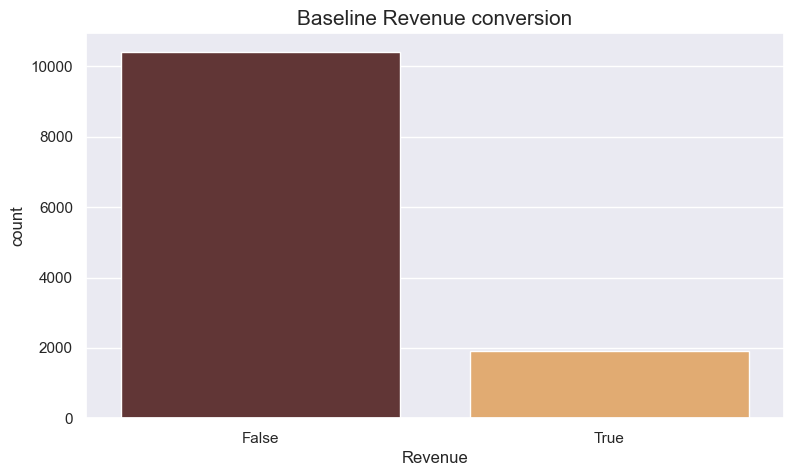

In [7]:
sns.countplot(df['Revenue'],palette=customPalette)
plt.title('Baseline Revenue conversion', fontsize = 15)
plt.show()

In [8]:
print(df['Revenue'].value_counts())
print()
print(df['Revenue'].value_counts(normalize=True))

False    10422
True      1908
Name: Revenue, dtype: int64

False    0.845255
True     0.154745
Name: Revenue, dtype: float64


In [9]:
1908/12330 * 100 

15.474452554744525

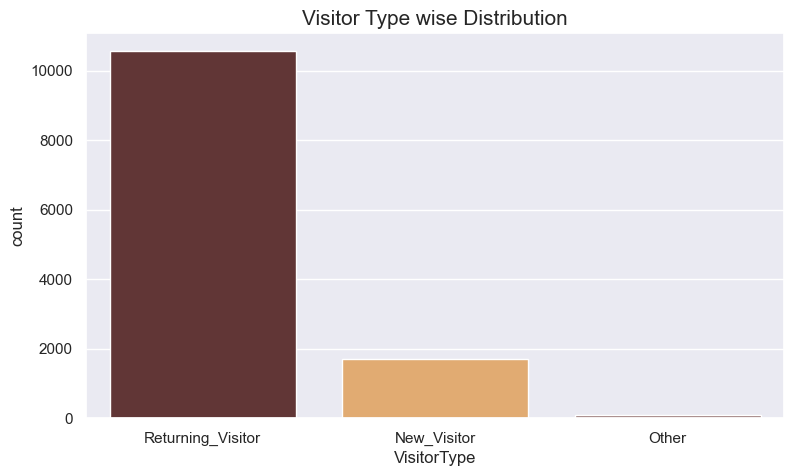

In [10]:
sns.countplot(df['VisitorType'],palette=customPalette)
plt.title('Visitor Type wise Distribution', fontsize = 15)
plt.show()

In [11]:
#calculation exact number of each visitor type
print(df['VisitorType'].value_counts())
print()
print(df['VisitorType'].value_counts(normalize=True))

Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64

Returning_Visitor    0.855718
New_Visitor          0.137388
Other                0.006894
Name: VisitorType, dtype: float64


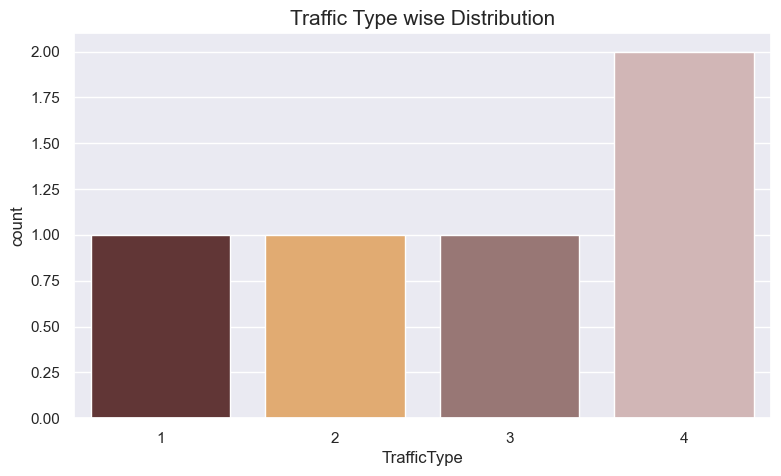

In [12]:
sns.countplot(df['TrafficType'].head(5), palette=customPalette)
plt.title('Traffic Type wise Distribution', fontsize = 15)
plt.show()

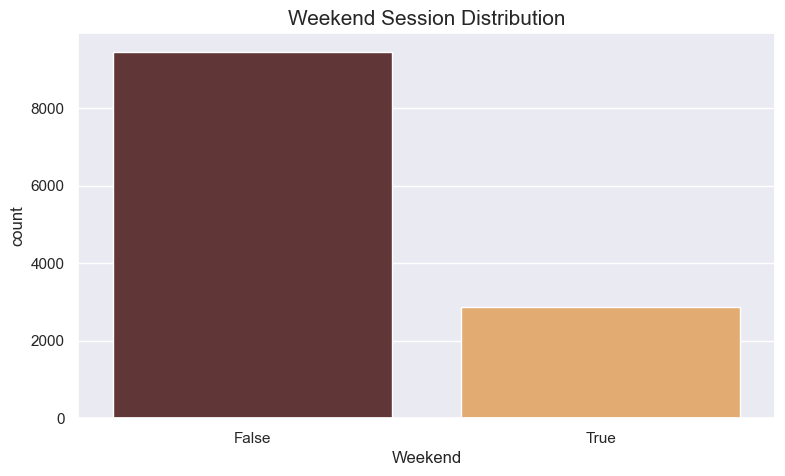

In [13]:
sns.countplot(df['Weekend'],palette=customPalette)
plt.title('Weekend Session Distribution', fontsize = 15)
plt.show()

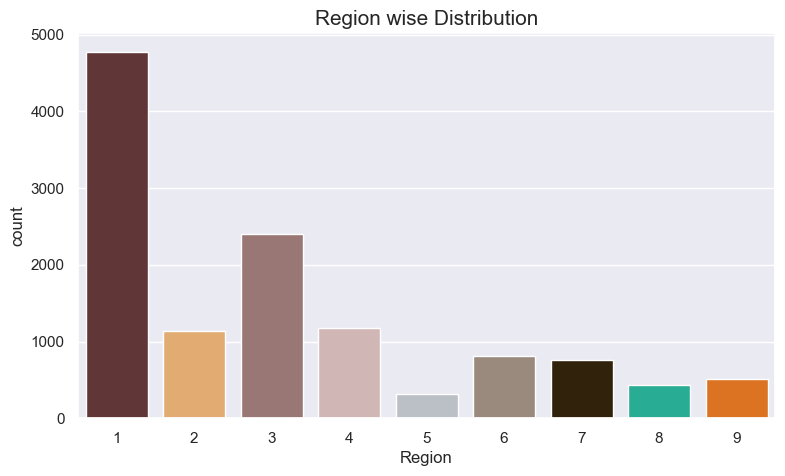

In [14]:
sns.countplot(df['Region'],palette=customPalette)
plt.title('Region wise Distribution', fontsize = 15)
plt.show()

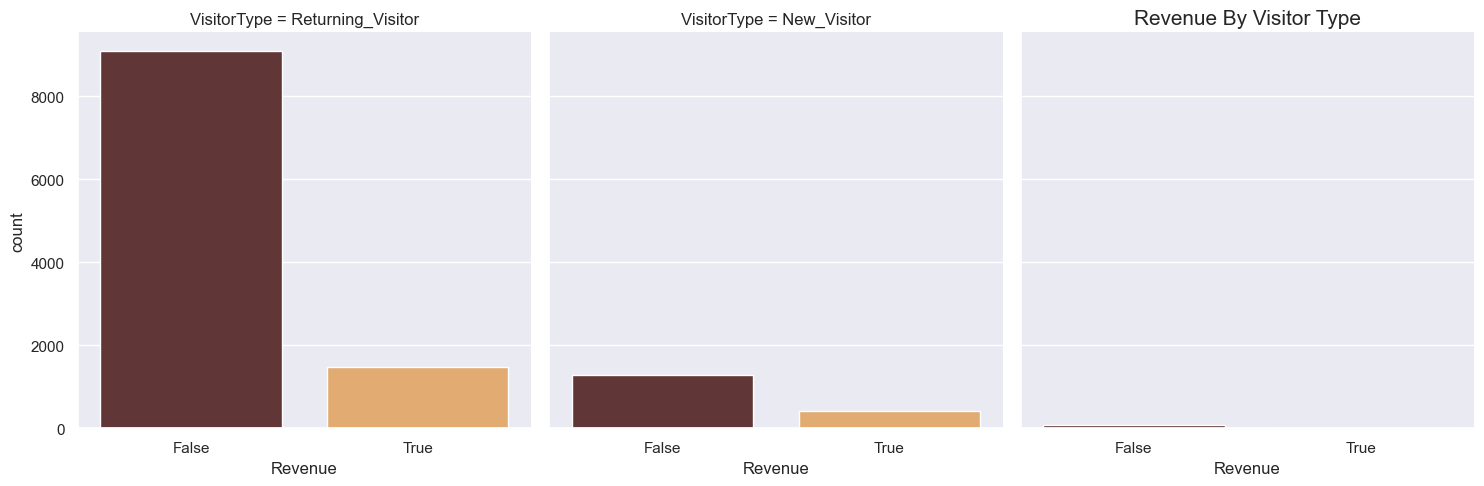

In [15]:
sns.catplot("Revenue", col="VisitorType", col_wrap=3,\
data=df,kind="count", height=5, aspect=1, palette=customPalette)
plt.title('Revenue By Visitor Type', fontsize = 15)
plt.show()

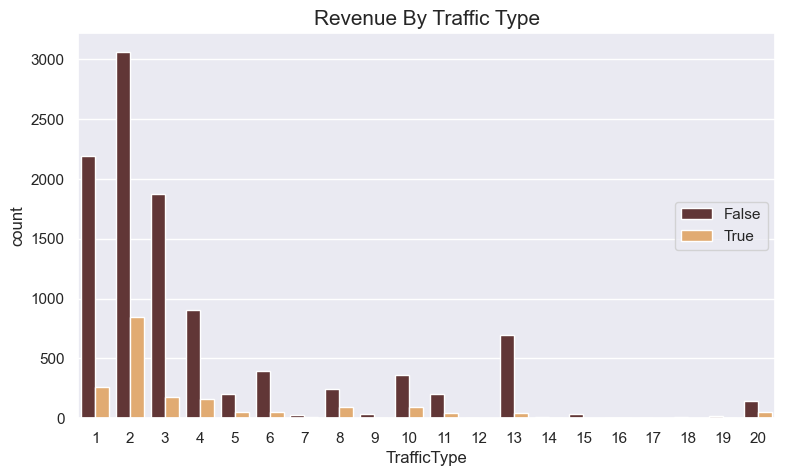

In [16]:
sns.countplot(x="TrafficType", hue="Revenue", data=df,palette=customPalette)
plt.legend(loc='right')
plt.title('Revenue By Traffic Type', fontsize = 15)
plt.show()

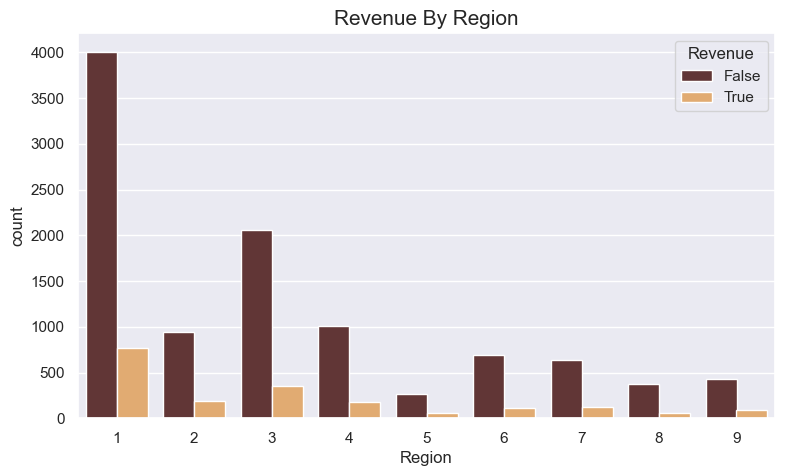

In [17]:
sns.countplot(x="Region", hue="Revenue", data=df,palette=customPalette)
plt.title('Revenue By Region', fontsize = 15)
plt.show()

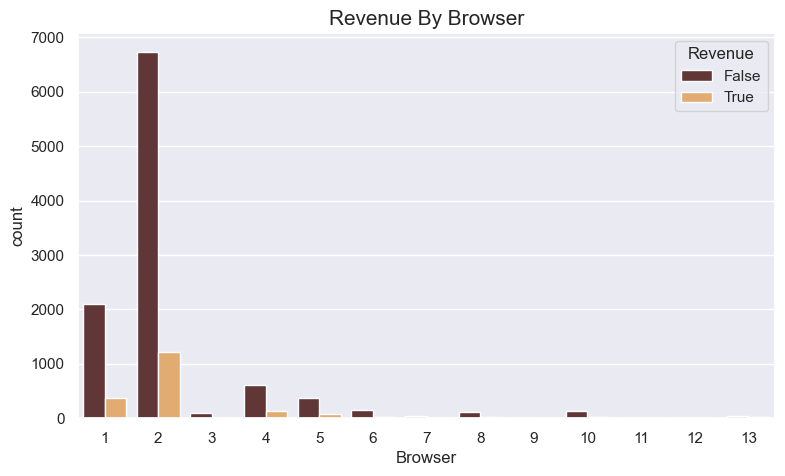

In [18]:
sns.countplot(x="Browser", hue="Revenue", data=df,palette=customPalette)
plt.title('Revenue By Browser', fontsize = 15)
plt.show()

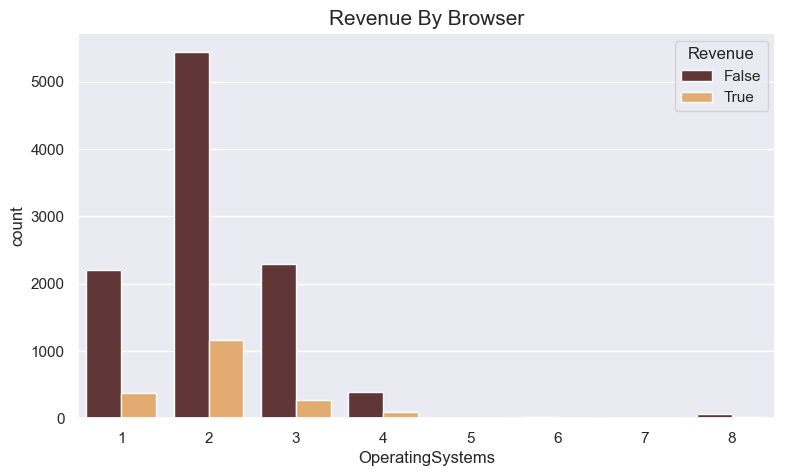

In [19]:
sns.countplot(x="OperatingSystems", hue="Revenue", data=df,palette=customPalette)
plt.title('Revenue By Browser', fontsize = 15)
plt.show()

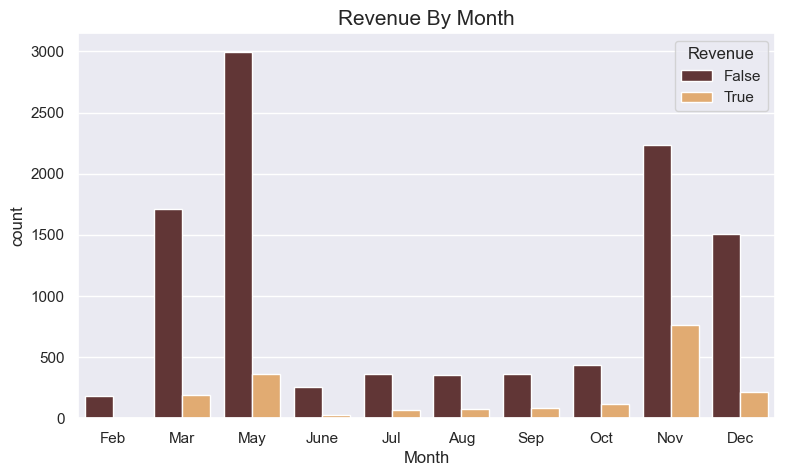

In [20]:
sns.countplot(x="Month", hue="Revenue",\
              data=df,order=['Feb','Mar','May','June','Jul','Aug','Sep','Oct',\
'Nov','Dec'],palette=customPalette)
plt.title('Revenue By Month', fontsize = 15)

plt.show()

Text(0.5, 1.0, 'Exit and Bounce Rates')

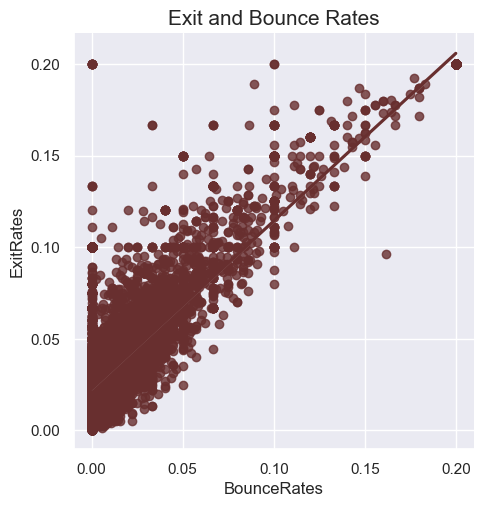

In [55]:
ax = sns.lmplot(x="BounceRates", y="ExitRates", data=df)
plt.title('Exit and Bounce Rates', fontsize = 15)

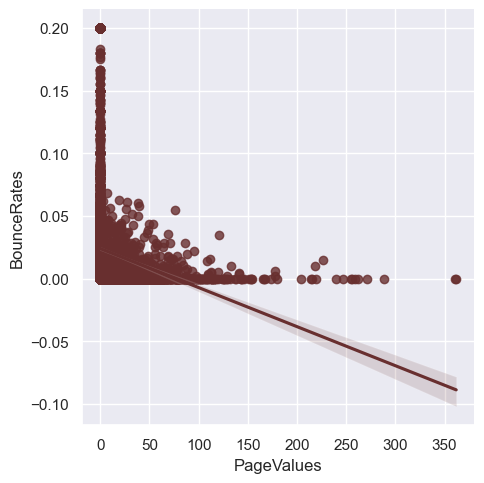

In [22]:

ax = sns.lmplot(x="PageValues", y="BounceRates" , data=df)

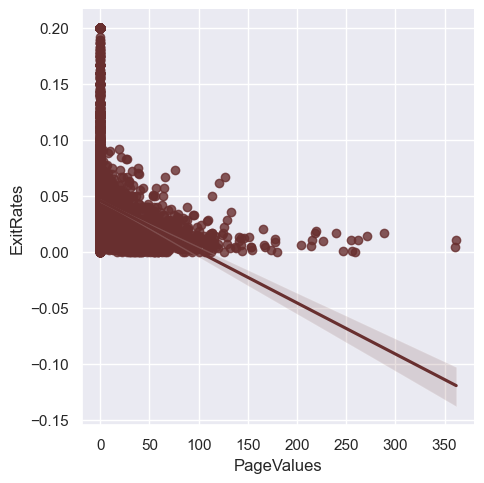

In [23]:

ax = sns.lmplot(x="PageValues", y="ExitRates" , data=df)

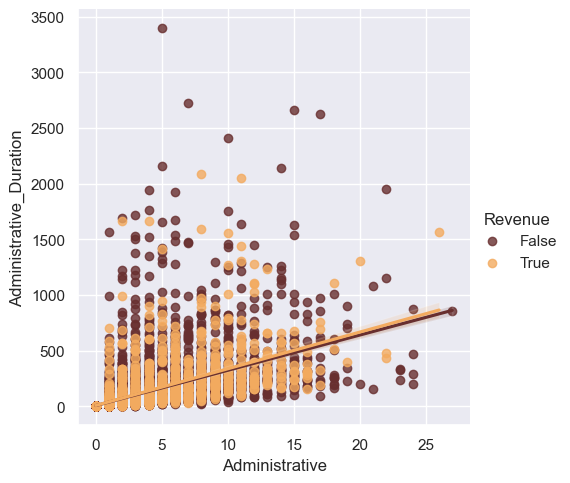

In [24]:
ax = sns.lmplot(x="Administrative", y="Administrative_Duration",\
                hue='Revenue', data=df)

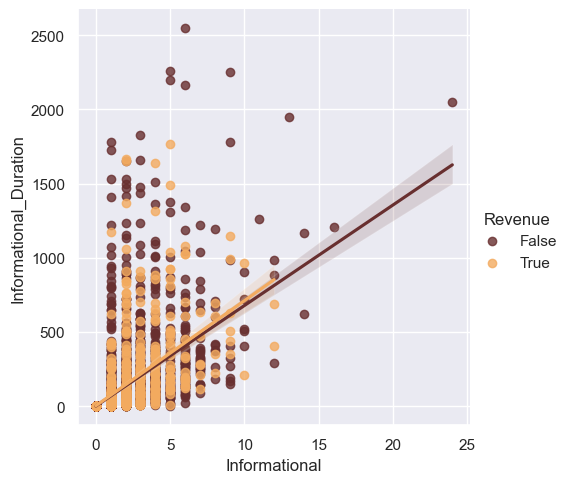

In [25]:

ax = sns.lmplot(x="Informational", y="Informational_Duration",\
                hue='Revenue', data=df)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [27]:
df_new = df.copy()                                                # Create copy of pandas DataFrame
df_new['Revenue'] = df_new['Revenue'].map({True: 'True', False: 'False'})  # Replace boolean by string
 

In [28]:
df_new['Weekend'] = df_new['Weekend'].map({True: 'True', False: 'False'})

In [29]:
df_new.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [30]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [31]:
numerical_features = [col for col in df_new.columns \
                      if np.issubdtype(df_new[col].dtype, np.number)]
print(numerical_features)

['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'OperatingSystems', 'Browser', 'Region', 'TrafficType']


In [32]:
df_new[numerical_features].describe().T

,count,mean,std,min,25%,50%,75%,max
Administrative,12330.0,2.315166,3.321784,0.0,0.000000,1.000000,4.000000,27.000000
Administrative_Duration,12330.0,80.818611,176.779107,0.0,0.000000,7.500000,93.256250,3398.750000
Informational,12330.0,0.503569,1.270156,0.0,0.000000,0.000000,0.000000,24.000000
Informational_Duration,12330.0,34.472398,140.749294,0.0,0.000000,0.000000,0.000000,2549.375000
ProductRelated,12330.0,31.731468,44.475503,0.0,7.000000,18.000000,38.000000,705.000000
ProductRelated_Duration,12330.0,1194.746220,1913.669288,0.0,184.137500,598.936905,1464.157214,63973.522230
BounceRates,12330.0,0.022191,0.048488,0.0,0.000000,0.003112,0.016813,0.200000
ExitRates,12330.0,0.043073,0.048597,0.0,0.014286,0.025156,0.050000,0.200000
PageValues,12330.0,5.889258,18.568437,0.0,0.000000,0.000000,0.000000,361.763742
SpecialDay,12330.0,0.061427,0.198917,0.0,0.000000,0.000000,0.000000,1.000000


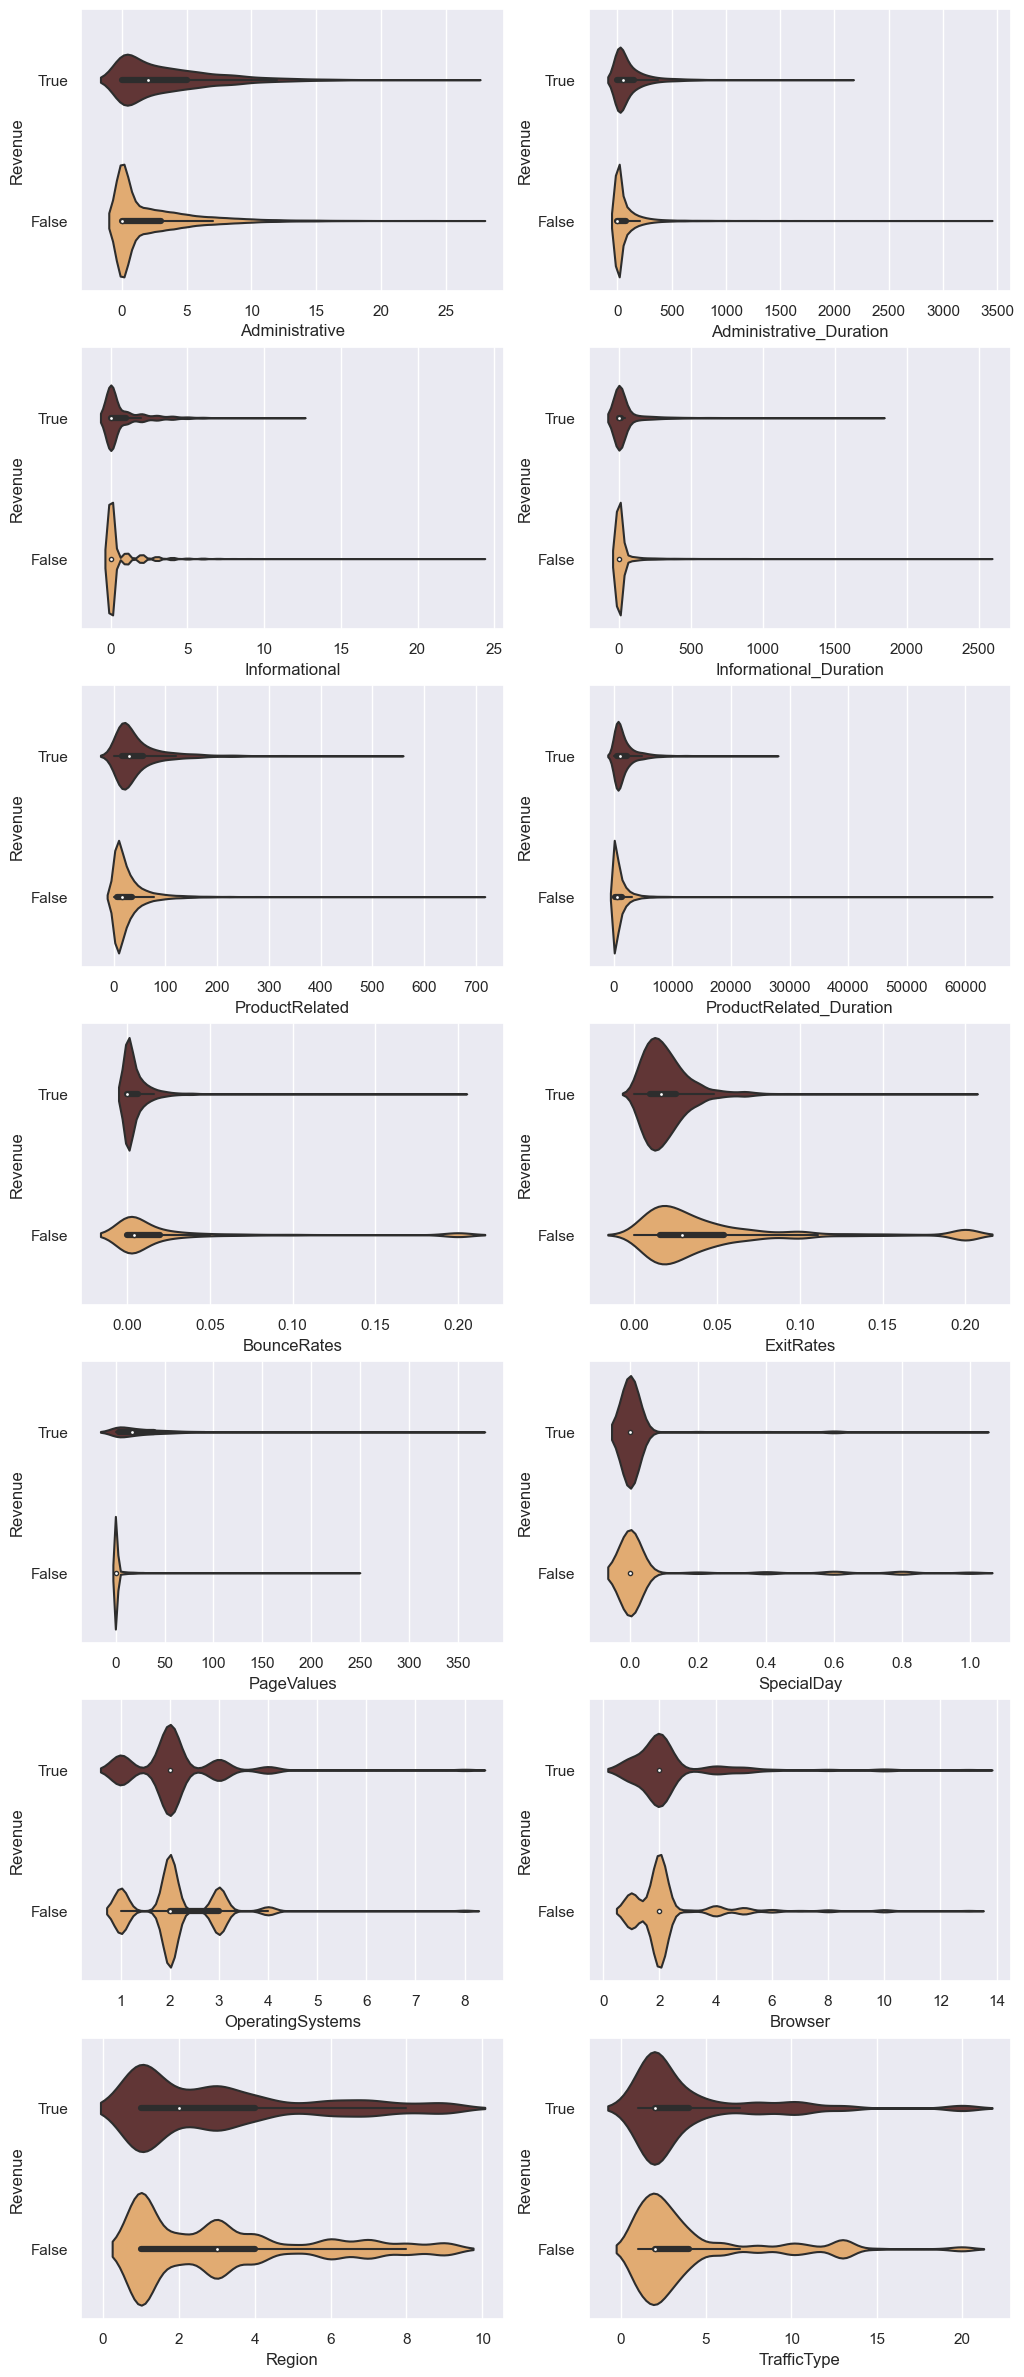

In [33]:
# create violin plots for successful and non-successful marketing campaigns
plt.figure(figsize=(12,30))
for index, col in enumerate(numerical_features):
    plt.subplot(7, 2, index+1)
    sns.violinplot(x=col, y="Revenue", data=df_new, order=["True", "False"])

In [34]:
from scipy.stats import ttest_ind
"""
define function for computing mean of column for yes and no cases,
as well as the test statistics and pvalue for equality of means test
"""
def test_means(data, col):
    yes_mask = data["Revenue"] == "True"
    values_yes = data[col][yes_mask]
    values_no = data[col][~yes_mask]
    mean_yes = values_yes.mean()
    mean_no = values_no.mean()
    ttest_res = ttest_ind(values_yes, values_no)
    return [col, mean_yes, mean_no, \
            round(ttest_res[0], 4), round(ttest_res[1],4)]

In [35]:
# define pandas dataframe, in which values should be filled
test_df = pd.DataFrame(columns=["column", "mean yes", \
                                "mean no", "ttest stat", \
                                "ttest pval"])
"""
for each column in the numerical_features, compute means and test
statistics and fill the values in the dataframe
"""
for index, col in enumerate(numerical_features):
    test_df.loc[index] = test_means(df_new, col)
test_df

,column,mean yes,mean no,ttest stat,ttest pval
0,Administrative,3.393606,2.117732,15.5752,0.0000
1,Administrative_Duration,119.483244,73.740111,10.4369,0.0000
2,Informational,0.786164,0.451833,10.6185,0.0000
3,Informational_Duration,57.611427,30.236237,7.8299,0.0000
4,ProductRelated,48.210168,28.714642,17.8282,0.0000
5,ProductRelated_Duration,1876.209615,1069.987809,17.1180,0.0000
6,BounceRates,0.005117,0.025317,-16.9226,0.0000
7,ExitRates,0.019555,0.047378,-23.5008,0.0000
8,PageValues,27.264518,1.975998,62.8432,0.0000
9,SpecialDay,0.023166,0.068432,-9.1695,0.0000


In [36]:
# create mask for successful calls
successful_calls = df_new.Revenue == "True"

In [37]:
# plot correlation matrix for successful calls
plot_data = df_new[successful_calls]
successful_corr = plot_data.corr()
successful_corr.style.background_gradient(cmap='coolwarm')\
.set_precision(2)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
Administrative,1.00,0.61,0.38,0.28,0.40,0.38,-0.04,-0.12,-0.16,-0.08,0.03,-0.05,-0.04,-0.00
Administrative_Duration,0.61,1.00,0.29,0.22,0.24,0.29,-0.03,-0.09,-0.09,-0.06,-0.00,-0.02,-0.03,0.02
Informational,0.38,0.29,1.00,0.63,0.34,0.35,0.02,-0.04,-0.14,-0.02,-0.02,-0.06,-0.07,-0.02
Informational_Duration,0.28,0.22,0.63,1.00,0.26,0.30,0.00,-0.04,-0.10,0.01,-0.00,-0.03,-0.04,-0.04
ProductRelated,0.40,0.24,0.34,0.26,1.00,0.91,-0.03,-0.15,-0.18,-0.05,0.01,-0.05,-0.10,-0.06
ProductRelated_Duration,0.38,0.29,0.35,0.30,0.91,1.00,-0.02,-0.12,-0.18,-0.05,0.00,-0.04,-0.08,-0.06
BounceRates,-0.04,-0.03,0.02,0.00,-0.03,-0.02,1.00,0.74,-0.15,0.03,0.03,0.00,-0.03,0.08
ExitRates,-0.12,-0.09,-0.04,-0.04,-0.15,-0.12,0.74,1.00,-0.23,0.02,-0.03,0.00,-0.03,0.06
PageValues,-0.16,-0.09,-0.14,-0.10,-0.18,-0.18,-0.15,-0.23,1.00,-0.03,0.08,0.11,0.06,0.08
SpecialDay,-0.08,-0.06,-0.02,0.01,-0.05,-0.05,0.03,0.02,-0.03,1.00,0.01,-0.00,0.02,-0.00


In [38]:
plot_data = df_new[~successful_calls]
unsuccessful_corr = plot_data.corr()
unsuccessful_corr.style.background_gradient(cmap='coolwarm')\
.set_precision(2)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
Administrative,1.00,0.59,0.37,0.24,0.43,0.35,-0.23,-0.33,0.21,-0.09,-0.01,-0.02,0.00,-0.04
Administrative_Duration,0.59,1.00,0.30,0.24,0.29,0.36,-0.15,-0.21,0.13,-0.07,-0.01,-0.02,0.00,-0.02
Informational,0.37,0.30,1.00,0.61,0.38,0.39,-0.12,-0.17,0.13,-0.04,-0.01,-0.04,-0.02,-0.04
Informational_Duration,0.24,0.24,0.61,1.00,0.28,0.36,-0.07,-0.10,0.08,-0.03,-0.01,-0.02,-0.02,-0.02
ProductRelated,0.43,0.29,0.38,0.28,1.00,0.84,-0.22,-0.31,0.12,-0.01,0.01,-0.01,-0.02,-0.04
ProductRelated_Duration,0.35,0.36,0.39,0.36,0.84,1.00,-0.19,-0.25,0.10,-0.02,0.01,-0.00,-0.02,-0.03
BounceRates,-0.23,-0.15,-0.12,-0.07,-0.22,-0.19,1.00,0.91,-0.08,0.06,0.02,-0.01,-0.01,0.08
ExitRates,-0.33,-0.21,-0.17,-0.10,-0.31,-0.25,0.91,1.00,-0.11,0.09,0.01,0.00,-0.01,0.08
PageValues,0.21,0.13,0.13,0.08,0.12,0.10,-0.08,-0.11,1.00,-0.04,0.01,-0.01,-0.00,-0.02
SpecialDay,-0.09,-0.07,-0.04,-0.03,-0.01,-0.02,0.06,0.09,-0.04,1.00,0.01,0.01,-0.02,0.06


In [39]:
"""
plot difference of successful - unsuccessful correlation matrices
"""
diff_corr = successful_corr - unsuccessful_corr
diff_corr.style.background_gradient(cmap='coolwarm')\
.set_precision(2)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
Administrative,0.00,0.02,0.01,0.04,-0.02,0.03,0.19,0.21,-0.36,0.01,0.04,-0.02,-0.05,0.04
Administrative_Duration,0.02,0.00,-0.01,-0.01,-0.06,-0.07,0.11,0.12,-0.21,0.01,0.01,0.00,-0.03,0.04
Informational,0.01,-0.01,0.00,0.01,-0.04,-0.03,0.14,0.13,-0.26,0.02,-0.01,-0.02,-0.05,0.01
Informational_Duration,0.04,-0.01,0.01,0.00,-0.01,-0.06,0.08,0.06,-0.18,0.04,0.01,-0.01,-0.02,-0.02
ProductRelated,-0.02,-0.06,-0.04,-0.01,0.00,0.07,0.18,0.15,-0.30,-0.05,-0.00,-0.04,-0.07,-0.03
ProductRelated_Duration,0.03,-0.07,-0.03,-0.06,0.07,0.00,0.16,0.14,-0.28,-0.03,-0.00,-0.04,-0.06,-0.03
BounceRates,0.19,0.11,0.14,0.08,0.18,0.16,0.00,-0.18,-0.08,-0.04,0.01,0.02,-0.02,-0.01
ExitRates,0.21,0.12,0.13,0.06,0.15,0.14,-0.18,0.00,-0.12,-0.07,-0.04,0.00,-0.02,-0.03
PageValues,-0.36,-0.21,-0.26,-0.18,-0.30,-0.28,-0.08,-0.12,0.00,0.02,0.07,0.12,0.06,0.10
SpecialDay,0.01,0.01,0.02,0.04,-0.05,-0.03,-0.04,-0.07,0.02,0.00,-0.01,-0.01,0.04,-0.06


In [40]:
import statsmodels.api as sm

In [41]:
# transform all features into numerical ones, by using 
# the get_dummies() function
X = df_new.drop("Revenue", axis=1)
X = pd.get_dummies(X, columns=['Month', 'VisitorType', 'Weekend'], drop_first=True)
X.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Month_Dec',
       'Month_Feb', 'Month_Jul', 'Month_June', 'Month_Mar', 'Month_May',
       'Month_Nov', 'Month_Oct', 'Month_Sep', 'VisitorType_Other',
       'VisitorType_Returning_Visitor', 'Weekend_True'],
      dtype='object')

In [42]:
X = sm.add_constant(X)
print(X.columns)

Index(['const', 'Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Month_Dec',
       'Month_Feb', 'Month_Jul', 'Month_June', 'Month_Mar', 'Month_May',
       'Month_Nov', 'Month_Oct', 'Month_Sep', 'VisitorType_Other',
       'VisitorType_Returning_Visitor', 'Weekend_True'],
      dtype='object')


In [43]:
# extract and transform target variable
y = np.where(df_new["Revenue"] == "True", 1 ,0)

In [44]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   const                          12330 non-null  float64
 1   Administrative                 12330 non-null  int64  
 2   Administrative_Duration        12330 non-null  float64
 3   Informational                  12330 non-null  int64  
 4   Informational_Duration         12330 non-null  float64
 5   ProductRelated                 12330 non-null  int64  
 6   ProductRelated_Duration        12330 non-null  float64
 7   BounceRates                    12330 non-null  float64
 8   ExitRates                      12330 non-null  float64
 9   PageValues                     12330 non-null  float64
 10  SpecialDay                     12330 non-null  float64
 11  OperatingSystems               12330 non-null  int64  
 12  Browser                        12330 non-null 

In [45]:
# define and fit model
full_logistic_regression_model = sm.Logit(y, X)
result = full_logistic_regression_model.fit(maxiter=500)
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.290069
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                12330
Model:                          Logit   Df Residuals:                    12303
Method:                           MLE   Df Model:                           26
Date:                Sun, 22 Jan 2023   Pseudo R-squ.:                  0.3268
Time:                        12:32:06   Log-Likelihood:                -3576.5
converged:                       True   LL-Null:                       -5312.4
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                            -1.6191      0.201     -8.046      0.

In [46]:
# Administrative duration vs Bounce Rate
x = df.iloc[:, [6, 8]].values
x.shape

(12330, 2)

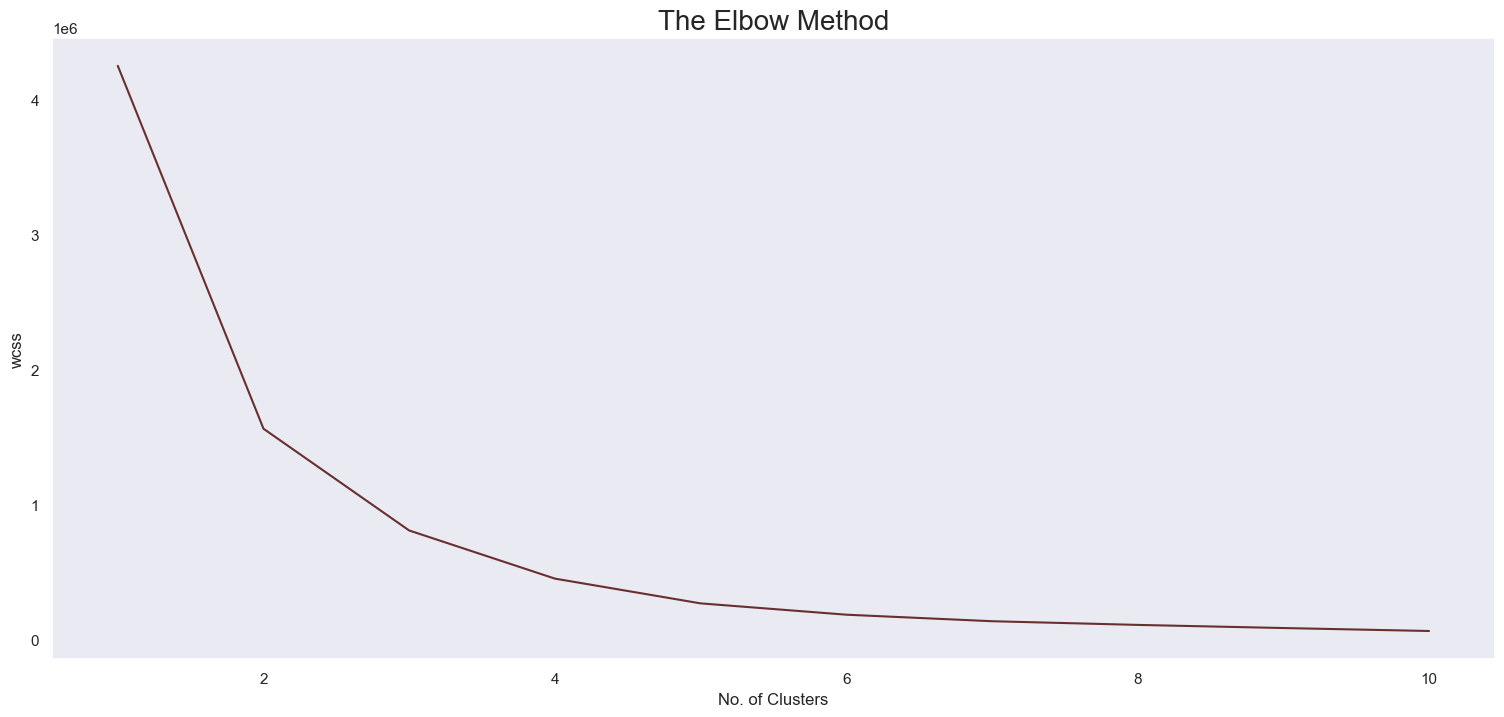

In [47]:
wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i,
              init = 'k-means++',
              max_iter = 300,
              n_init = 10,
              random_state = 0,
              algorithm = 'elkan',
              tol = 0.001)
    km.fit(x)
    labels = km.labels_
    wcss.append(km.inertia_)
    
plt.rcParams['figure.figsize'] = (15, 7)
plt.plot(range(1, 11), wcss)
plt.grid()
plt.tight_layout()
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

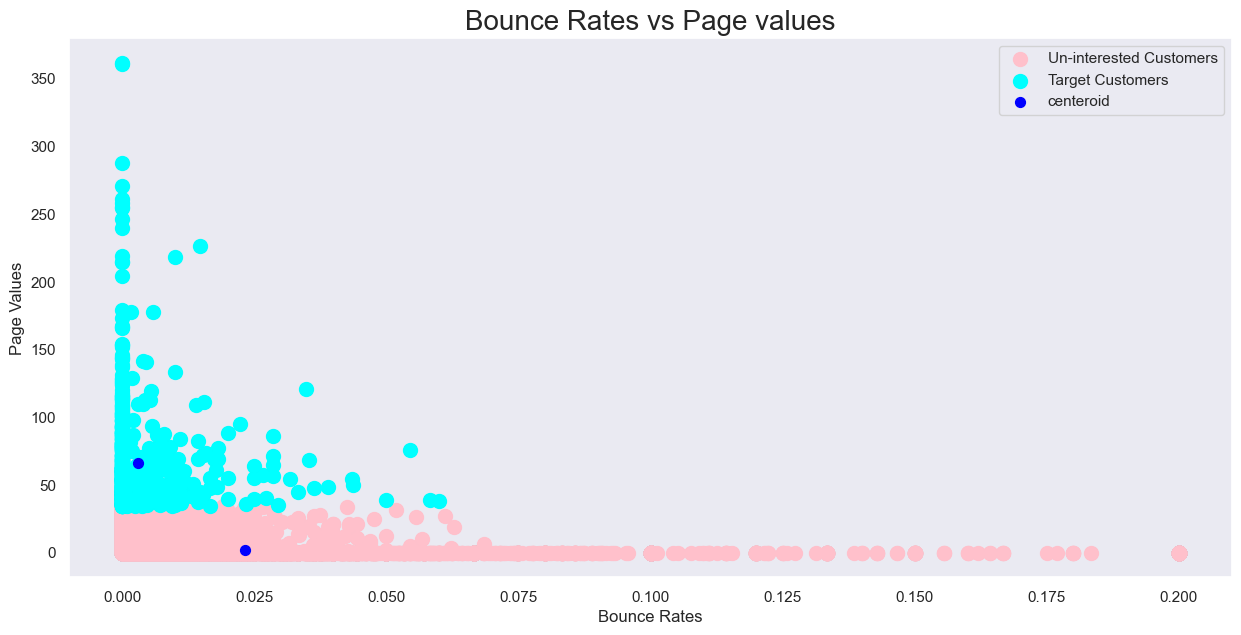

In [48]:
km = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'pink', label = 'Un-interested Customers')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'cyan', label = 'Target Customers')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.title('Bounce Rates vs Page values', fontsize = 20)
plt.grid()
plt.xlabel('Bounce Rates')
plt.ylabel('Page Values')
plt.legend()
plt.show()

In [49]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [50]:
# Administrative duration vs Bounce Rate
x = df.iloc[:, [5, 7]].values
x.shape

(12330, 2)

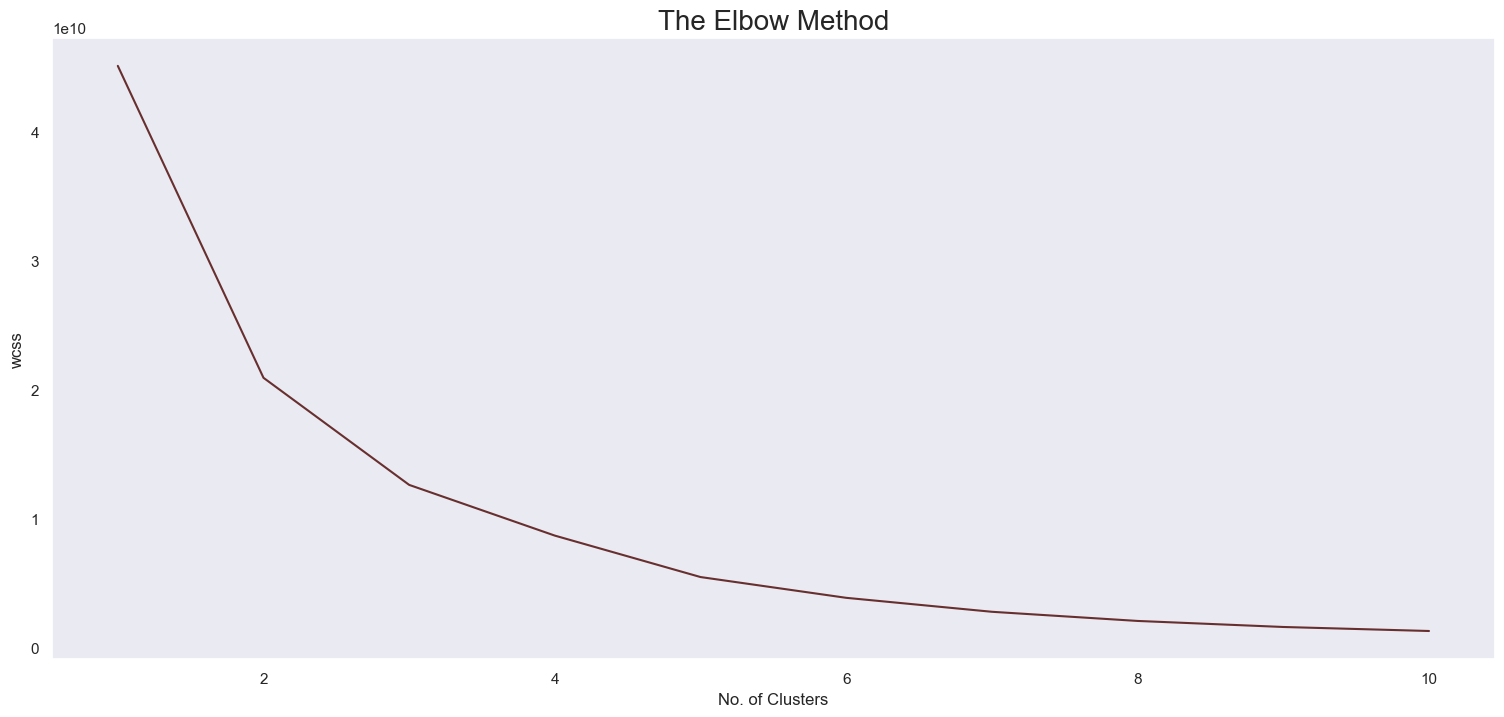

In [51]:
wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i,
              init = 'k-means++',
              max_iter = 300,
              n_init = 10,
              random_state = 0,
              algorithm = 'elkan',
              tol = 0.001)
    km.fit(x)
    labels = km.labels_
    wcss.append(km.inertia_)
    
plt.rcParams['figure.figsize'] = (15, 7)
plt.plot(range(1, 11), wcss)
plt.grid()
plt.tight_layout()
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

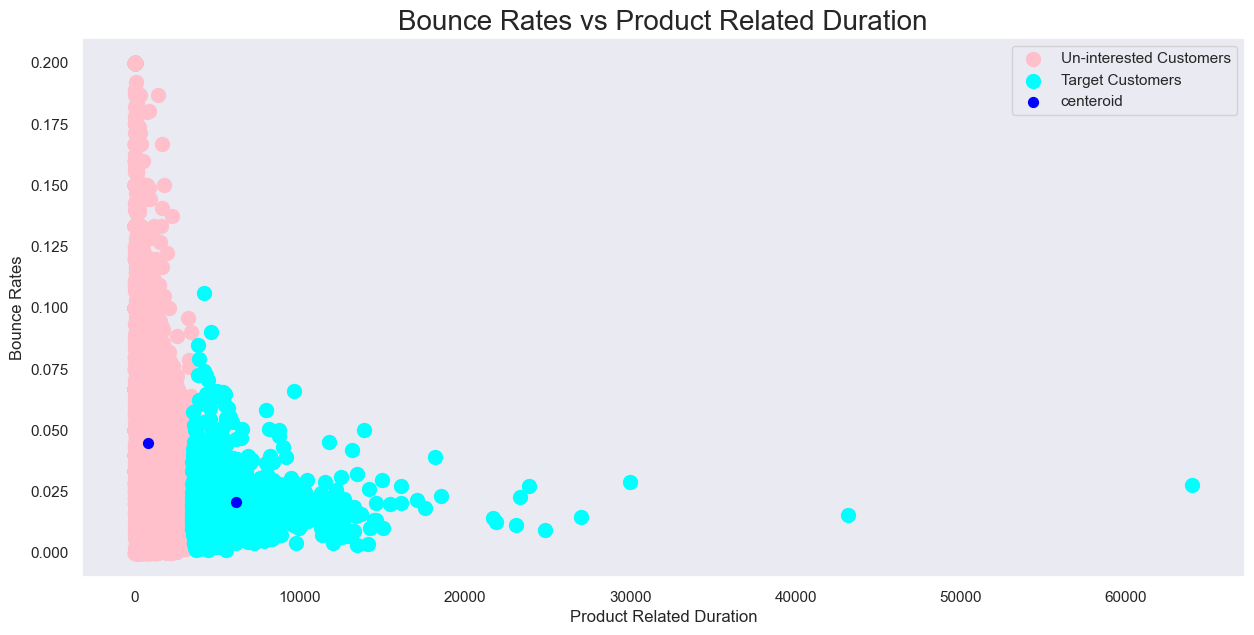

In [52]:
km = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'pink', label = 'Un-interested Customers')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'cyan', label = 'Target Customers')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.title('Bounce Rates vs Product Related Duration', fontsize = 20)
plt.grid()
plt.xlabel('Product Related Duration')
plt.ylabel('Bounce Rates')
plt.legend()
plt.show()